# Importing the dependencies

In [26]:
# Importing all the dependencies
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Loading the data

In [27]:
# Load the Data
dataset1 = pd.read_csv('final_preprocessed_data.csv')
dataset1.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Beta,P/E Ratio,Market Cap,...,Revenue Growth,Profit Margin,PC1,PC2,PC3,Daily_Return,MA20,MA50,Log_PE_Ratio,Log_PEG_Ratio
0,-0.527490,-0.528801,-0.526355,-0.527421,-0.529219,-0.177086,Z74.SI,-0.33756,1.03557,5.317283e+10,...,-0.357757,-0.428535,-1.746289,-1.285688,0.711104,-0.000131,0.00001,0.00001,0.710776,-0.2276
1,-0.527319,-0.528716,-0.526527,-0.527676,-0.529440,-0.103929,Z74.SI,-0.33756,1.03557,5.317283e+10,...,-0.357757,-0.428535,-1.746289,-1.285688,0.711104,0.000677,0.00001,0.00001,0.710776,-0.2276
2,-0.527745,-0.529055,-0.526527,-0.527847,-0.529587,-0.133960,Z74.SI,-0.33756,1.03557,5.317283e+10,...,-0.357757,-0.428535,-1.746289,-1.285688,0.711104,0.000192,0.00001,0.00001,0.710776,-0.2276
3,-0.527831,-0.529139,-0.526871,-0.527761,-0.529513,0.027768,Z74.SI,-0.33756,1.03557,5.317283e+10,...,-0.357757,-0.428535,-1.746289,-1.285688,0.711104,-0.000131,0.00001,0.00001,0.710776,-0.2276
4,-0.528257,-0.528885,-0.526871,-0.527506,-0.529293,0.073270,Z74.SI,-0.33756,1.03557,5.317283e+10,...,-0.357757,-0.428535,-1.746289,-1.285688,0.711104,-0.001421,0.00001,0.00001,0.710776,-0.2276


In [28]:
dataset1.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Beta',
       'P/E Ratio', 'Market Cap', '52 Week High', '52 Week Low',
       '50 Day Moving Average', '200 Day Moving Average', 'Forward P/E Ratio',
       'PEG Ratio', 'Dividend Yield', 'Dividend Rate', 'Payout Ratio',
       'Revenue Growth', 'Profit Margin', 'PC1', 'PC2', 'PC3', 'Daily_Return',
       'MA20', 'MA50', 'Log_PE_Ratio', 'Log_PEG_Ratio'],
      dtype='object')

In [29]:
dataset1.isna().sum()

Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Ticker                    0
Beta                      0
P/E Ratio                 0
Market Cap                0
52 Week High              0
52 Week Low               0
50 Day Moving Average     0
200 Day Moving Average    0
Forward P/E Ratio         0
PEG Ratio                 0
Dividend Yield            0
Dividend Rate             0
Payout Ratio              0
Revenue Growth            0
Profit Margin             0
PC1                       0
PC2                       0
PC3                       0
Daily_Return              0
MA20                      0
MA50                      0
Log_PE_Ratio              0
Log_PEG_Ratio             0
dtype: int64

## Aggregating the data for selected feature

In [30]:
# AGGREGATION
aggregated_dataset1 = dataset1.groupby('Ticker').agg({
    'Daily_Return': 'mean',
    'Volume': 'mean',
    'Adj Close': 'mean',
    'Market Cap': 'mean',
    'Beta': 'mean',
    'P/E Ratio': 'mean',
    'PC1': 'mean',
    'PC2': 'mean',
    'PC3': 'mean'
}).reset_index()

aggregated_dataset1


,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3
0,9CI.SI,0.000058,-0.208416,-0.527212,1.582730e+10,-0.194696,2.263523,0.598509,0.588040,0.065306
1,A17U.SI,0.000036,-0.148855,-0.532121,1.275124e+10,-0.380206,1.995714,-0.007453,-0.007557,-0.001224
2,AAPL,0.006361,0.967379,0.723892,3.439320e+12,1.210488,0.145350,-0.007237,-0.006056,0.001234
3,AJBU.SI,0.000035,-0.243631,-0.536903,3.778429e+09,-0.216019,-0.156676,-0.007453,-0.007557,-0.001224
4,AMD,0.014817,0.601414,0.322331,2.585522e+11,2.176419,3.000000,-0.007237,-0.006056,0.001234
5,AMZN,0.000661,0.668811,0.690379,1.943050e+12,1.010052,0.437150,-0.007237,-0.006056,0.001234
6,ARKK,0.003148,-0.133826,0.030471,1.000000e-05,-1.433540,-0.880751,-0.007237,-0.006056,0.001234
7,AW9U.SI,0.000033,-0.295607,-0.551976,5.847464e+08,-0.363148,-0.603024,-0.007453,-0.007557,-0.001224
8,BABA,0.008135,-0.036313,0.666374,2.710991e+11,-0.734168,-0.037849,-0.007237,-0.006056,0.001234
9,BN4.SI,0.000036,-0.251733,-0.518566,1.195632e+10,0.016401,-0.400292,-0.007453,-0.007557,-0.001224


## Normalizing the data

In [31]:
# Z score normalisation

# Selecting columns to normalize (excluding 'Ticker')
columns_to_normalize = aggregated_dataset1.columns.difference(['Ticker'])

# Initializing the scaler
scaler = StandardScaler()

# Standardizing the selected columns
aggregated_dataset1[columns_to_normalize] = scaler.fit_transform(aggregated_dataset1[columns_to_normalize])

# Display the standardized dataset
aggregated_dataset1



,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3
0,9CI.SI,0.108949,-0.295183,-0.588197,-0.353376,-0.187510,2.512047,7.128608,7.134230,6.895156
1,A17U.SI,0.107176,-0.187630,-0.593331,-0.357173,-0.371350,2.213294,-0.149207,-0.152425,-0.191319
2,AAPL,0.615222,1.828062,0.720118,3.872884,1.205027,0.149128,-0.146620,-0.134057,0.070430
3,AJBU.SI,0.107109,-0.358775,-0.598331,-0.368250,-0.208641,-0.187796,-0.149207,-0.152425,-0.191319
4,AMD,1.294352,1.167205,0.300194,-0.053735,2.162264,3.333621,-0.146620,-0.134057,0.070430
5,AMZN,0.157416,1.288911,0.685073,2.025757,1.006395,0.474644,-0.146620,-0.134057,0.070430
6,ARKK,0.357115,-0.160490,-0.005012,-0.372915,-1.415204,-0.995536,-0.146620,-0.134057,0.070430
7,AW9U.SI,0.106983,-0.452633,-0.614094,-0.372193,-0.354446,-0.685718,-0.149207,-0.152425,-0.191319
8,BABA,0.757705,0.015599,0.659970,-0.038246,-0.722126,-0.055239,-0.146620,-0.134057,0.070430
9,BN4.SI,0.107238,-0.373406,-0.579156,-0.358155,0.021687,-0.459562,-0.149207,-0.152425,-0.191319


In [32]:
dataset2 = pd.read_csv('financial_input_data 2.csv')
dataset2.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Ticker,Beta,P/E Ratio,...,PEG Ratio,Dividend Yield,Dividend Rate,Payout Ratio,Revenue Growth,Profit Margin,Year,PC1,PC2,PC3
0,2020-01-02,3.39,3.40,3.36,3.40,2.869367,10742600,Z74.SI,0.514,64.4,...,0.92,0.0347,0.11,2.2105,-0.022,0.0713,2020,8.206207,-4.302924,2.317798
1,2020-01-03,3.41,3.41,3.34,3.37,2.844049,15917300,Z74.SI,0.514,64.4,...,0.92,0.0347,0.11,2.2105,-0.022,0.0713,2020,8.206207,-4.302924,2.317798
2,2020-01-06,3.36,3.37,3.34,3.35,2.827170,13793100,Z74.SI,0.514,64.4,...,0.92,0.0347,0.11,2.2105,-0.022,0.0713,2020,8.206207,-4.302924,2.317798
3,2020-01-07,3.35,3.36,3.30,3.36,2.835609,25232800,Z74.SI,0.514,64.4,...,0.92,0.0347,0.11,2.2105,-0.022,0.0713,2020,8.206207,-4.302924,2.317798
4,2020-01-08,3.30,3.39,3.30,3.39,2.860927,28451400,Z74.SI,0.514,64.4,...,0.92,0.0347,0.11,2.2105,-0.022,0.0713,2020,8.206207,-4.302924,2.317798


In [33]:
dataset2

,Date_x,Open,High,Low,Close,Adj Close,Volume,Ticker,Beta,P/E Ratio,...,PEG Ratio,Dividend Yield,Dividend Rate,Payout Ratio,Revenue Growth,Profit Margin,Year,PC1,PC2,PC3
0,2020-01-02,3.390000,3.400000,3.360000,3.400000,2.869367,10742600,Z74.SI,0.51400,64.40000,...,0.92000,0.03470,0.11000,2.21050,-0.02200,0.07130,2020,8.206207,-4.302924,2.317798
1,2020-01-03,3.410000,3.410000,3.340000,3.370000,2.844049,15917300,Z74.SI,0.51400,64.40000,...,0.92000,0.03470,0.11000,2.21050,-0.02200,0.07130,2020,8.206207,-4.302924,2.317798
2,2020-01-06,3.360000,3.370000,3.340000,3.350000,2.827170,13793100,Z74.SI,0.51400,64.40000,...,0.92000,0.03470,0.11000,2.21050,-0.02200,0.07130,2020,8.206207,-4.302924,2.317798
3,2020-01-07,3.350000,3.360000,3.300000,3.360000,2.835609,25232800,Z74.SI,0.51400,64.40000,...,0.92000,0.03470,0.11000,2.21050,-0.02200,0.07130,2020,8.206207,-4.302924,2.317798
4,2020-01-08,3.300000,3.390000,3.300000,3.390000,2.860927,28451400,Z74.SI,0.51400,64.40000,...,0.92000,0.03470,0.11000,2.21050,-0.02200,0.07130,2020,8.206207,-4.302924,2.317798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66338,2024-08-26,46.189999,46.404999,45.490002,45.730000,45.730000,4373400,ARKK,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,2024,10.237566,-0.948671,2.574411
66339,2024-08-27,45.360001,45.647999,44.930000,45.419998,45.419998,4287700,ARKK,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,2024,10.237566,-0.948671,2.574411
66340,2024-08-28,45.209999,45.299999,43.764999,44.270000,44.270000,9604400,ARKK,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,2024,10.237566,-0.948671,2.574411
66341,2024-08-29,44.770000,45.634998,44.630001,44.680000,44.680000,6658000,ARKK,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,2024,10.237566,-0.948671,2.574411


In [34]:
dataset2.columns

Index(['Date_x', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker', 'Beta', 'P/E Ratio', 'Market Cap', '52 Week High',
       '52 Week Low', '50 Day Moving Average', '200 Day Moving Average',
       'Forward P/E Ratio', 'PEG Ratio', 'Dividend Yield', 'Dividend Rate',
       'Payout Ratio', 'Revenue Growth', 'Profit Margin', 'Year', 'PC1', 'PC2',
       'PC3'],
      dtype='object')

In [35]:
dataset2.isna().sum()

Date_x                    0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Ticker                    0
Beta                      0
P/E Ratio                 0
Market Cap                0
52 Week High              0
52 Week Low               0
50 Day Moving Average     0
200 Day Moving Average    0
Forward P/E Ratio         0
PEG Ratio                 0
Dividend Yield            0
Dividend Rate             0
Payout Ratio              0
Revenue Growth            0
Profit Margin             0
Year                      0
PC1                       0
PC2                       0
PC3                       0
dtype: int64

In [36]:
dataset1['Date'] = dataset2['Date_x']
dataset1.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Beta',
       'P/E Ratio', 'Market Cap', '52 Week High', '52 Week Low',
       '50 Day Moving Average', '200 Day Moving Average', 'Forward P/E Ratio',
       'PEG Ratio', 'Dividend Yield', 'Dividend Rate', 'Payout Ratio',
       'Revenue Growth', 'Profit Margin', 'PC1', 'PC2', 'PC3', 'Daily_Return',
       'MA20', 'MA50', 'Log_PE_Ratio', 'Log_PEG_Ratio', 'Date'],
      dtype='object')

In [37]:
pivot_table_daily_returns = dataset1.pivot_table(
    index='Date',           # Set the index to Date
    columns='Ticker',       # Set columns to Ticker
    values='Daily_Return',  # Set values to Daily_Return
    aggfunc='mean'          # Using mean as there are multiple entries for the same date and ticker
)

# Displaying the pivot table
print(pivot_table_daily_returns)

Ticker        9CI.SI   A17U.SI      AAPL   AJBU.SI       AMD      AMZN  \
Date                                                                     
2020-01-02       NaN -0.000131  0.116075  0.000028 -0.121182  0.040019   
2020-01-03       NaN  0.000030  0.006738 -0.000605 -0.032640  0.018331   
2020-01-06       NaN -0.000291  0.183013 -0.000447 -0.021041  0.076954   
2020-01-07       NaN -0.000291 -0.038455 -0.000289  0.069427  0.003555   
2020-01-08       NaN -0.000932  0.166429 -0.000289  0.001523 -0.010637   
...              ...       ...       ...       ...       ...       ...   
2024-08-26  0.000188 -0.000131  0.002443  0.000028 -0.052872 -0.010951   
2024-08-27  0.000188  0.000189  0.012472  0.000028  0.004156 -0.009643   
2024-08-28 -0.000609 -0.000131 -0.008949  0.000028 -0.036344 -0.026841   
2024-08-29 -0.000769 -0.000131 -0.002037 -0.000131 -0.013737 -0.010374   
2024-08-30 -0.000610 -0.000291 -0.007372  0.000028  0.012438  0.053025   

Ticker          ARKK   AW9U.SI      B

# K means Clustering

## Elbow method to find the optimal K

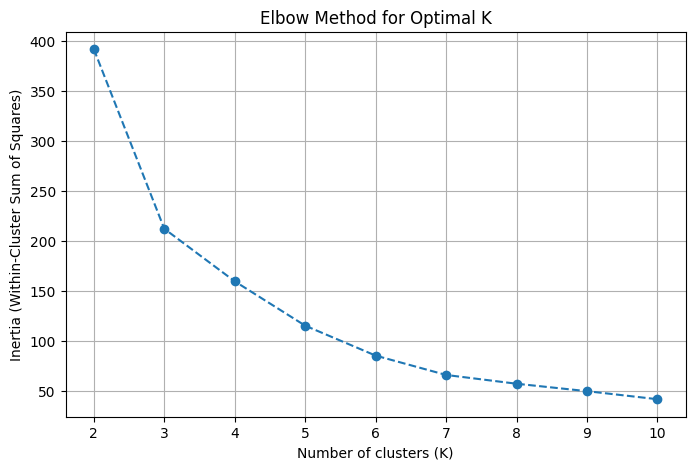

In [38]:
# K means clustering

# Method 1: ELBOW METHOD TO FIND THE OPTIMAL K-value
# 'aggregated_dataset1' is already normalized, excluding 'Ticker'
columns_to_cluster = aggregated_dataset1.columns.difference(['Ticker'])

# List to store the inertia for each K value
inertia_values = []

# Checking for K values between 2 and 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_dataset1[columns_to_cluster])
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

*INFERENCE*

Inertia decreases fast between 3 and 4

## Silhouette method to find the optimal K

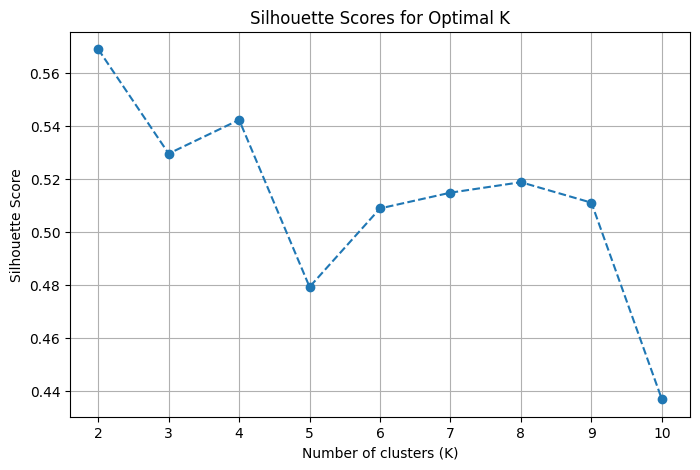

In [39]:
# Method 2: SILHOUETTE SCORE TO FIND THE OPTIMAL K

# List to store silhouette scores for each K
silhouette_scores = []

# Checking silhouette score for K values between 2 and 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_dataset1[columns_to_cluster])
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(aggregated_dataset1[columns_to_cluster], labels))

# Plotting Silhouette Score Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

*INFERENCE*

Highest point is 3, 4

## Creating the k means model

In [40]:
def apply_kmeans(scaled_data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    return kmeans, clusters

In [41]:
aggregated_dataset1[columns_to_cluster].head()

,Adj Close,Beta,Daily_Return,Market Cap,P/E Ratio,PC1,PC2,PC3,Volume
0,-0.588197,-0.187510,0.108949,-0.353376,2.512047,7.128608,7.134230,6.895156,-0.295183
1,-0.593331,-0.371350,0.107176,-0.357173,2.213294,-0.149207,-0.152425,-0.191319,-0.187630
2,0.720118,1.205027,0.615222,3.872884,0.149128,-0.146620,-0.134057,0.070430,1.828062
3,-0.598331,-0.208641,0.107109,-0.368250,-0.187796,-0.149207,-0.152425,-0.191319,-0.358775
4,0.300194,2.162264,1.294352,-0.053735,3.333621,-0.146620,-0.134057,0.070430,1.167205


### Defining with 5 clusters

In [42]:
k5,c5 = apply_kmeans(aggregated_dataset1[columns_to_cluster],5)
aggregated_dataset1['Cluster5'] = c5

### Defining with 4 clusters

In [43]:
k4,c4 = apply_kmeans(aggregated_dataset1[columns_to_cluster],4)
aggregated_dataset1['Cluster4'] = c4

### Defining with 3 clusters

In [44]:
k3,c3 = apply_kmeans(aggregated_dataset1[columns_to_cluster],3)
aggregated_dataset1['Cluster3'] = c3

In [45]:
aggregated_dataset1.head()

,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
0,9CI.SI,0.108949,-0.295183,-0.588197,-0.353376,-0.187510,2.512047,7.128608,7.134230,6.895156,2,2,2
1,A17U.SI,0.107176,-0.187630,-0.593331,-0.357173,-0.371350,2.213294,-0.149207,-0.152425,-0.191319,0,0,0
2,AAPL,0.615222,1.828062,0.720118,3.872884,1.205027,0.149128,-0.146620,-0.134057,0.070430,1,1,1
3,AJBU.SI,0.107109,-0.358775,-0.598331,-0.368250,-0.208641,-0.187796,-0.149207,-0.152425,-0.191319,0,0,0
4,AMD,1.294352,1.167205,0.300194,-0.053735,2.162264,3.333621,-0.146620,-0.134057,0.070430,1,1,1


In [46]:
# print(cluster_summary)

In [47]:
numeric_cols = aggregated_dataset1.select_dtypes(include=['number']).columns
def plot_feature_boxplot(agg_data, feature, cluster_feature):
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cluster_feature, y=feature, data=agg_data)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.ylabel(f'{feature}')
    plt.xlabel(cluster_feature)
    plt.tight_layout()
    plt.show()
def plot_cluster_scatter(cluster_summary, feature_x, feature_y):
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(cluster_summary[feature_x], cluster_summary[feature_y], s=100, c=cluster_summary.index, cmap='Set1', label=cluster_summary.index)
    
    for i, label in enumerate(cluster_summary.index):
        plt.annotate(label, (cluster_summary[feature_x][i], cluster_summary[feature_y][i]), textcoords="offset points", xytext=(5,5), ha='center')
    
    plt.title(f'{feature_x} vs {feature_y} by Cluster')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.colorbar()
    plt.show()

### Visualizing when k = 5

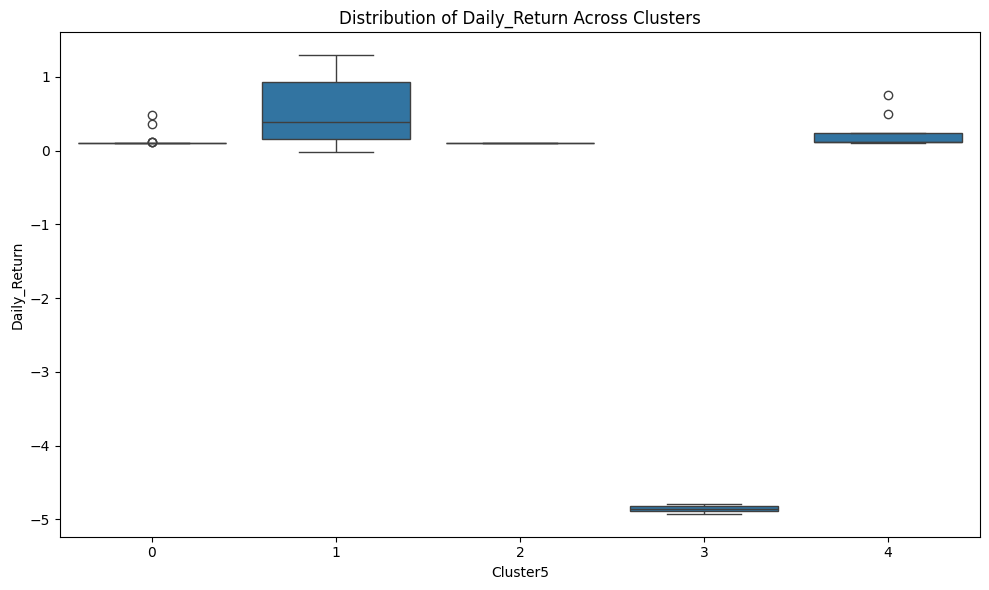

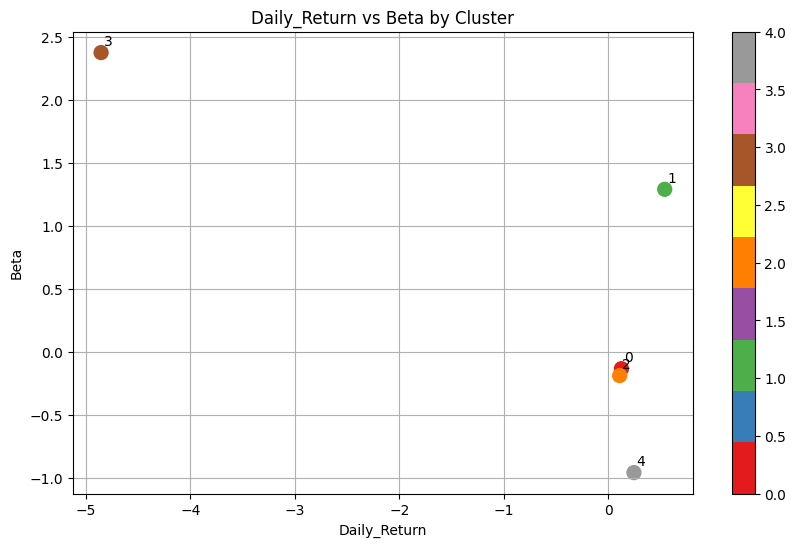

In [48]:
cluster_summary = aggregated_dataset1.groupby('Cluster5')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster5') 
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

### Visualizing when k = 4

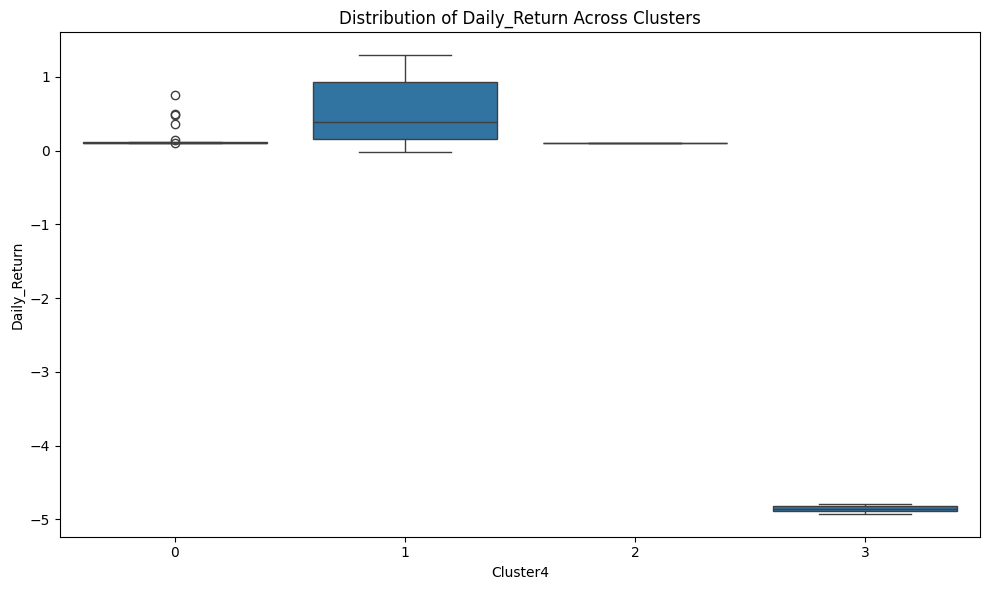

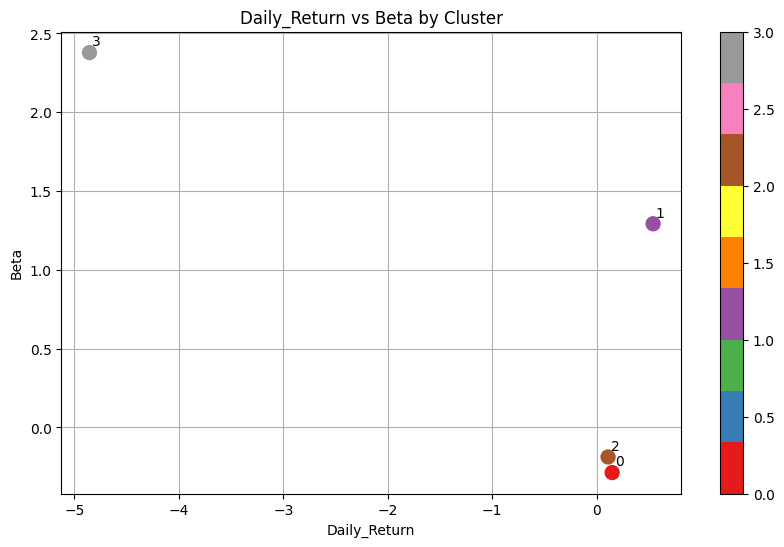

In [49]:
cluster_summary = aggregated_dataset1.groupby('Cluster4')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster4') 
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

### Visualizing when k = 3

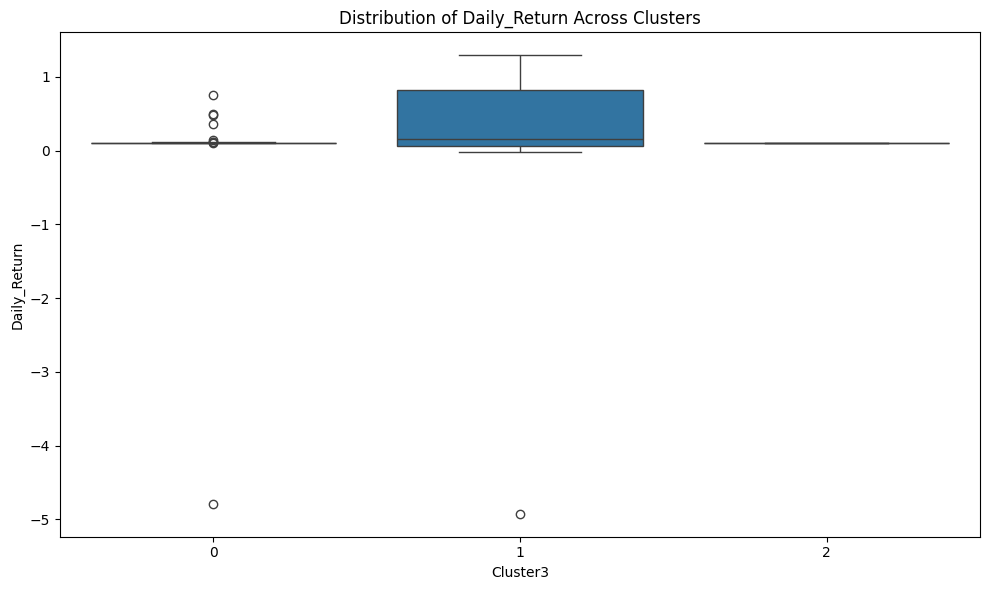

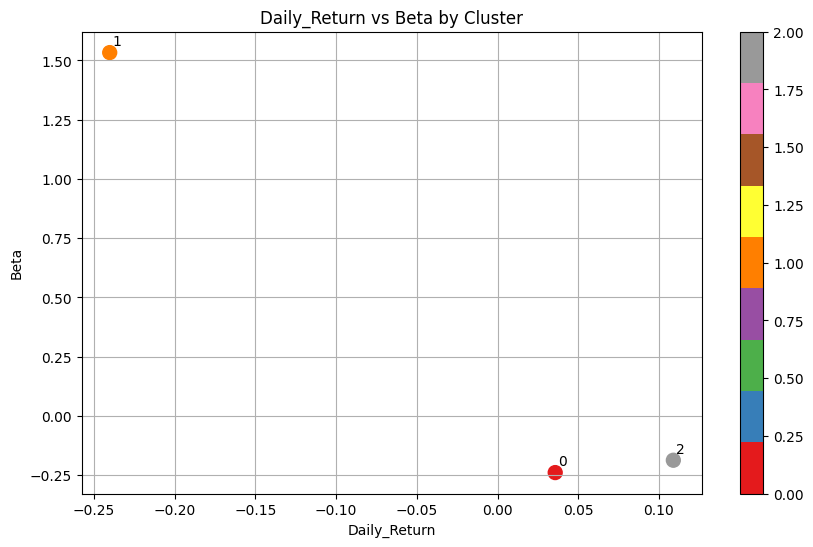

In [50]:
cluster_summary = aggregated_dataset1.groupby('Cluster3')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster3') 
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

# Building the cluster based on Low risk and Max return

In [51]:
# Selecting the tickers with min risk and max return
def minimize_risk(aggregated_data, kmeans, n_min_stocks=10):
    sorted_points = aggregated_data.sort_values(by='Beta', ascending=True).index  # Sort by Beta (low to high)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks
 
def maximize_returns(aggregated_data, kmeans, n_min_stocks=10):
    sorted_points = aggregated_data.sort_values(by='Daily_Return', ascending=False).index  # Sort by Daily Return (high to low)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

In [52]:
min_risk_10stock = minimize_risk(aggregated_dataset1, kmeans)

In [53]:
max_return_10stock = maximize_returns(aggregated_dataset1, kmeans)

In [54]:
print("stocks with minimum risks: ",min_risk_10stock)
print("stocks with maximum returns: ",max_return_10stock)

stocks with minimum risks:  ['QQQ' 'IVV' 'VOO' 'SPY' 'ARKK' 'ES3.SI' 'VTI' 'CEDU.SI' 'S68.SI'
 'CJLU.SI']
stocks with maximum returns:  ['AMD' 'GOOGL' 'BABA' 'AAPL' 'J36.SI' 'LVMUY' 'ARKK' 'AMZN' 'MSFT' 'QQQ']


# Building portfolio

In [55]:
min_risk_10stock_df = aggregated_dataset1[aggregated_dataset1['Ticker'].isin(min_risk_10stock)]
max_return_10stock_df = aggregated_dataset1[aggregated_dataset1['Ticker'].isin(max_return_10stock)]
min_risk_10stock_df

,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
6,ARKK,0.357115,-0.160490,-0.005012,-0.372915,-1.415204,-0.995536,-0.146620,-0.134057,0.070430,0,0,0
14,CEDU.SI,0.106897,-0.505991,-0.613253,-0.372875,-1.290551,-0.995536,-0.149207,-0.152425,-0.191319,0,0,0
15,CJLU.SI,0.106320,-0.326086,-0.609089,-0.368513,-0.971472,0.016905,-0.149207,-0.152425,-0.191319,0,0,0
18,ES3.SI,0.107969,-0.481973,-0.590573,-0.372915,-1.415204,-0.572964,-0.149207,-0.152425,-0.191319,0,0,0
23,IVV,0.118362,-0.382223,2.821810,-0.372915,-1.415204,-0.044036,-0.146620,-0.134057,0.070430,4,0,0
37,QQQ,0.145459,0.788047,2.329855,-0.372915,-1.415204,0.307175,-0.146620,-0.134057,0.070430,4,0,0
41,S68.SI,0.105690,-0.444295,-0.536692,-0.357568,-1.089806,-0.294824,-0.149207,-0.152425,-0.191319,0,0,0
43,SPY,0.118111,1.608365,2.817176,-0.372915,-1.415204,-0.044707,-0.146620,-0.134057,0.070430,4,0,0
49,VOO,0.118614,-0.390966,2.634737,-0.372915,-1.415204,-0.050247,-0.146620,-0.134057,0.070430,4,0,0
50,VTI,0.107578,-0.413354,1.219698,-0.372915,-1.415204,-0.119597,-0.146620,-0.134057,0.070430,4,0,0


In [56]:
min_risk_10stock_df.reset_index(inplace=True)
min_risk_10stock_df

,index,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
0,6,ARKK,0.357115,-0.160490,-0.005012,-0.372915,-1.415204,-0.995536,-0.146620,-0.134057,0.070430,0,0,0
1,14,CEDU.SI,0.106897,-0.505991,-0.613253,-0.372875,-1.290551,-0.995536,-0.149207,-0.152425,-0.191319,0,0,0
2,15,CJLU.SI,0.106320,-0.326086,-0.609089,-0.368513,-0.971472,0.016905,-0.149207,-0.152425,-0.191319,0,0,0
3,18,ES3.SI,0.107969,-0.481973,-0.590573,-0.372915,-1.415204,-0.572964,-0.149207,-0.152425,-0.191319,0,0,0
4,23,IVV,0.118362,-0.382223,2.821810,-0.372915,-1.415204,-0.044036,-0.146620,-0.134057,0.070430,4,0,0
5,37,QQQ,0.145459,0.788047,2.329855,-0.372915,-1.415204,0.307175,-0.146620,-0.134057,0.070430,4,0,0
6,41,S68.SI,0.105690,-0.444295,-0.536692,-0.357568,-1.089806,-0.294824,-0.149207,-0.152425,-0.191319,0,0,0
7,43,SPY,0.118111,1.608365,2.817176,-0.372915,-1.415204,-0.044707,-0.146620,-0.134057,0.070430,4,0,0
8,49,VOO,0.118614,-0.390966,2.634737,-0.372915,-1.415204,-0.050247,-0.146620,-0.134057,0.070430,4,0,0
9,50,VTI,0.107578,-0.413354,1.219698,-0.372915,-1.415204,-0.119597,-0.146620,-0.134057,0.070430,4,0,0


In [57]:
# min_risk_10stock_df.drop(columns='level_0', inplace=True)

In [58]:
max_return_10stock_df

,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
2,AAPL,0.615222,1.828062,0.720118,3.872884,1.205027,0.149128,-0.146620,-0.134057,0.070430,1,1,1
4,AMD,1.294352,1.167205,0.300194,-0.053735,2.162264,3.333621,-0.146620,-0.134057,0.070430,1,1,1
5,AMZN,0.157416,1.288911,0.685073,2.025757,1.006395,0.474644,-0.146620,-0.134057,0.070430,1,1,1
6,ARKK,0.357115,-0.160490,-0.005012,-0.372915,-1.415204,-0.995536,-0.146620,-0.134057,0.070430,0,0,0
8,BABA,0.757705,0.015599,0.659970,-0.038246,-0.722126,-0.055239,-0.146620,-0.134057,0.070430,4,0,0
20,GOOGL,1.032779,0.342765,0.431694,2.174198,0.780292,-0.199100,-0.146620,-0.134057,0.070430,1,1,1
24,J36.SI,0.501686,-0.504782,-0.213072,-0.360270,-0.561530,3.333621,-0.149207,-0.152425,-0.191319,4,0,0
27,LVMUY,0.478071,-0.508191,0.621669,0.100947,0.619696,-0.211043,-0.146620,-0.134057,0.070430,0,0,0
29,MSFT,0.155012,0.233585,1.917218,3.487336,0.478118,0.185912,-0.146620,-0.134057,0.070430,1,1,1
37,QQQ,0.145459,0.788047,2.329855,-0.372915,-1.415204,0.307175,-0.146620,-0.134057,0.070430,4,0,0


In [59]:
max_return_10stock_df.reset_index(inplace=True)
max_return_10stock_df

,index,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
0,2,AAPL,0.615222,1.828062,0.720118,3.872884,1.205027,0.149128,-0.146620,-0.134057,0.070430,1,1,1
1,4,AMD,1.294352,1.167205,0.300194,-0.053735,2.162264,3.333621,-0.146620,-0.134057,0.070430,1,1,1
2,5,AMZN,0.157416,1.288911,0.685073,2.025757,1.006395,0.474644,-0.146620,-0.134057,0.070430,1,1,1
3,6,ARKK,0.357115,-0.160490,-0.005012,-0.372915,-1.415204,-0.995536,-0.146620,-0.134057,0.070430,0,0,0
4,8,BABA,0.757705,0.015599,0.659970,-0.038246,-0.722126,-0.055239,-0.146620,-0.134057,0.070430,4,0,0
5,20,GOOGL,1.032779,0.342765,0.431694,2.174198,0.780292,-0.199100,-0.146620,-0.134057,0.070430,1,1,1
6,24,J36.SI,0.501686,-0.504782,-0.213072,-0.360270,-0.561530,3.333621,-0.149207,-0.152425,-0.191319,4,0,0
7,27,LVMUY,0.478071,-0.508191,0.621669,0.100947,0.619696,-0.211043,-0.146620,-0.134057,0.070430,0,0,0
8,29,MSFT,0.155012,0.233585,1.917218,3.487336,0.478118,0.185912,-0.146620,-0.134057,0.070430,1,1,1
9,37,QQQ,0.145459,0.788047,2.329855,-0.372915,-1.415204,0.307175,-0.146620,-0.134057,0.070430,4,0,0


In [60]:
# max_return_10stock_df.drop(columns='level_0', inplace=True)
# max_return_10stock_df

## Equal Weight (EW) Portfolio

In [61]:
# Equal Weight (EW) Portfolio

def equal_weight_portfolio(n):
    return np.array([1.0 / n] * n)

# Number of stocks
n_stocks = 10

# Equal weights for the portfolio
ew_weights = equal_weight_portfolio(n_stocks)
print("EW Weights:",ew_weights)

EW Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


## Market Cap Weighted (MCW) Portfolio

In [62]:
# Market Cap Weighted (MCW) Portfolio

def market_cap_weighted_portfolio(stock_data):
    # Extract market capitalization
    market_caps = stock_data['Market Cap']
    
    # Normalize market caps to sum to 1
    mcw_weights = market_caps / market_caps.sum()
    
    return mcw_weights

# Market cap weighted portfolio
mcw_weights_min_risk = market_cap_weighted_portfolio(min_risk_10stock_df)
mcw_weights_max_return = market_cap_weighted_portfolio(max_return_10stock_df)

print("MCW Weights Min:\n", mcw_weights_min_risk)
print("MCW Weights Max:\n", mcw_weights_max_return)

MCW Weights Min:
 0    0.100533
1    0.100523
2    0.099347
3    0.100533
4    0.100533
5    0.100533
6    0.096396
7    0.100533
8    0.100533
9    0.100533
Name: Market Cap, dtype: float64
MCW Weights Max:
 0    0.370149
1   -0.005136
2    0.193611
3   -0.035641
4   -0.003655
5    0.207798
6   -0.034433
7    0.009648
8    0.333300
9   -0.035641
Name: Market Cap, dtype: float64


In [63]:
pivot_table_daily_returns_min = pivot_table_daily_returns.loc[:,min_risk_10stock]
pivot_table_daily_returns_min

Ticker,QQQ,IVV,VOO,SPY,ARKK,ES3.SI,VTI,CEDU.SI,S68.SI,CJLU.SI
Date,,,,,,,,,,
2020-01-02,0.011640,0.005022,0.004728,0.005011,0.010024,-0.000292,0.002828,-0.000053,0.000753,0.000103
2020-01-03,0.005783,0.004837,0.004294,0.004746,-0.024643,0.000353,0.006339,0.000025,0.004478,0.000103
2020-01-06,0.020622,0.012331,0.012644,0.012204,-0.062980,0.000240,0.015888,0.000025,0.000573,-0.000052
2020-01-07,-0.000893,-0.001141,-0.001394,-0.001263,-0.032338,-0.000196,-0.001908,0.000025,0.000573,0.000103
2020-01-08,0.010822,0.005535,0.005691,0.005722,-0.082724,-0.000631,0.006987,-0.000053,0.000396,0.000103
...,...,...,...,...,...,...,...,...,...,...
2024-08-26,0.000000,0.000000,0.000000,0.000000,0.024417,0.000144,-0.005970,-0.000007,0.000781,0.000103
2024-08-27,0.000000,0.000000,0.000000,0.000000,-0.002694,-0.000002,0.004787,0.000039,-0.001414,-0.000052
2024-08-28,0.000000,0.000000,0.000000,0.000000,0.047123,0.000192,-0.006527,-0.000145,-0.000867,-0.000052


In [64]:
pivot_table_daily_returns_max = pivot_table_daily_returns.loc[:,max_return_10stock]
pivot_table_daily_returns_max

Ticker,AMD,GOOGL,BABA,AAPL,J36.SI,LVMUY,ARKK,AMZN,MSFT,QQQ
Date,,,,,,,,,,
2020-01-02,-0.121182,0.471444,0.020787,0.116075,-0.062115,0.009353,0.010024,0.040019,0.019484,0.011640
2020-01-03,-0.032640,0.316143,0.004141,0.006738,0.006320,0.022479,-0.024643,0.018331,0.003028,0.005783
2020-01-06,-0.021041,1.003442,0.011535,0.183013,-0.020750,0.050769,-0.062980,0.076954,0.021045,0.020622
2020-01-07,0.069427,-0.058386,-0.000226,-0.038455,-0.013751,-0.013447,-0.032338,0.003555,-0.018698,-0.000893
2020-01-08,0.001523,0.112780,0.009090,0.166429,-0.064920,0.036602,-0.082724,-0.010637,0.012191,0.010822
...,...,...,...,...,...,...,...,...,...,...
2024-08-26,-0.052872,-0.002365,-0.008442,0.002443,-0.018348,-0.006838,0.024417,-0.010951,-0.008332,0.000000
2024-08-27,0.004156,-0.011724,-0.048886,0.012472,0.000535,-0.001623,-0.002694,-0.009643,0.002690,0.000000
2024-08-28,-0.036344,-0.022142,-0.095665,-0.008949,-0.003298,-0.015112,0.047123,-0.026841,-0.012371,0.000000


In [65]:
# Calculating covariance matrix and mean returns for minimum risk portfolio
mean_returns_min = pivot_table_daily_returns_min.mean()
cov_matrix_min = pivot_table_daily_returns_min.cov()

# Calculating covariance matrix and mean returns for maximum return portfolio
mean_returns_max = pivot_table_daily_returns_max.mean()
cov_matrix_max = pivot_table_daily_returns_max.cov()

## Global Minimum Variance (GMV) Portfolio

In [66]:
# Global Minimum Variance (GMV) Portfolio

# Portfolio volatility (used in GMV)
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Defining minimum variance portfolio function
def min_variance_portfolio(mean_returns, cov_matrix):
    n = len(mean_returns)
    args = (mean_returns, cov_matrix)

    # Initial guess for weights (equal weighting)
    initial_weights = n * [1. / n]

    # Constraints: Weights must sum to 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Bounds for weights (between 0 and 1)
    bounds = tuple((0, 1) for _ in range(n))

    # Minimize portfolio volatility
    result = minimize(portfolio_volatility, initial_weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)

    return result['x']

# GMV portfolio weights
gmv_weights_min = min_variance_portfolio(mean_returns_min.values, cov_matrix_min.values)
gmv_weights_max = min_variance_portfolio(mean_returns_max.values, cov_matrix_max.values)

print("GMV Weights Min:", gmv_weights_min)
print("GMV Weights Max:", gmv_weights_max)


GMV Weights Min: [0.00000000e+00 3.11452691e-17 0.00000000e+00 4.82068057e-04
 0.00000000e+00 3.11148506e-01 0.00000000e+00 3.46559551e-01
 0.00000000e+00 3.41809875e-01]
GMV Weights Max: [2.37682587e-18 0.00000000e+00 0.00000000e+00 1.34233480e-03
 3.43705506e-04 0.00000000e+00 1.45097366e-03 2.65210642e-17
 5.25985980e-17 9.96862986e-01]


## Maximum Sharpe Ratio (MSR) Portfolio

In [67]:
# Maximum Sharpe Ratio (MSR) Portfolio

def portfolio_return(weights, mean_returns):
    """
    Calculate the expected return of the portfolio.
    
    :param weights: The weights of the portfolio.
    :param mean_returns: The expected mean returns of the stocks.
    :return: The expected return of the portfolio.
    """
    return np.sum(weights * mean_returns)

# Defining portfolio volatility function
def portfolio_volatility(weights, cov_matrix):
    """
    Calculate the volatility (standard deviation) of the portfolio.
    
    :param weights: The weights of the portfolio.
    :param cov_matrix: The covariance matrix of the stock returns.
    :return: The volatility of the portfolio.
    """
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    """
    Calculate the negative Sharpe ratio of the portfolio.
    
    :param weights: The weights of the portfolio.
    :param mean_returns: The expected mean returns of the stocks.
    :param cov_matrix: The covariance matrix of the stock returns.
    :param risk_free_rate: The risk-free rate to use in Sharpe ratio calculation (default is 0.01).
    :return: The negative Sharpe ratio.
    """
    p_ret = portfolio_return(weights, mean_returns)
    p_vol = portfolio_volatility(weights, cov_matrix)
    
    # Sharpe ratio = (Return - Risk-free rate) / Volatility
    sharpe_ratio = (p_ret - risk_free_rate) / p_vol
    
    # Return negative Sharpe ratio for minimization
    return -sharpe_ratio

def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate=0.01):
    """
    Maximize the Sharpe ratio to find the optimal weights for the portfolio.
    
    :param mean_returns: The expected mean returns of the stocks.
    :param cov_matrix: The covariance matrix of the stock returns.
    :param risk_free_rate: The risk-free rate to use in Sharpe ratio calculation (default is 0.01).
    :return: The optimal portfolio weights that maximize the Sharpe ratio.
    """
    n = len(mean_returns)
    initial_weights = np.array([1.0 / n] * n)
    args = (mean_returns, cov_matrix, risk_free_rate)
    
    # Constraints: weights must sum to 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    # Bounds: weights between 0 and 1
    bounds = tuple((0, 1) for _ in range(n))
    
    # Maximize Sharpe ratio (minimize negative Sharpe ratio)
    result = minimize(negative_sharpe_ratio, initial_weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result['x']  # Optimal weights

# MSR portfolio weights
msr_weights_min = max_sharpe_portfolio(mean_returns_min, cov_matrix_min)
msr_weights_max = max_sharpe_portfolio(mean_returns_max, cov_matrix_max)

print("MSR Weights Min:", msr_weights_min)
print("MSR Weights Max:", msr_weights_max)


MSR Weights Min: [1.38777878e-16 8.32667268e-17 2.77555756e-17 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.38777878e-17 1.38777878e-17
 4.16333634e-17 1.38777878e-17]
MSR Weights Max: [3.36354658e-01 6.63645342e-01 2.94346830e-16 1.07552856e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


## Portfolio Performance Calculation

In [68]:
# Portfolio Performance Calculation

def portfolio_performance(weights, mean_returns, cov_matrix):
    # Expected portfolio return
    ret = np.sum(weights * mean_returns)
    
    # Expected portfolio volatility
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    return ret, vol

# EW Portfolio performance
ew_ret_min, ew_vol_min = portfolio_performance(ew_weights, mean_returns_min, cov_matrix_min)
ew_ret_max, ew_vol_max = portfolio_performance(ew_weights, mean_returns_max, cov_matrix_max)

# MCW Portfolio performance
mcw_ret_min, mcw_vol_min = portfolio_performance(mcw_weights_min_risk, mean_returns_min, cov_matrix_min)
mcw_ret_max, mcw_vol_max = portfolio_performance(mcw_weights_max_return, mean_returns_max, cov_matrix_max)

# GMV Portfolio performance
gmv_ret_min, gmv_vol_min = portfolio_performance(gmv_weights_min, mean_returns_min, cov_matrix_min)
gmv_ret_max, gmv_vol_max = portfolio_performance(gmv_weights_max, mean_returns_max, cov_matrix_max)

# MSR Portfolio performance
msr_ret_min, msr_vol_min = portfolio_performance(msr_weights_min, mean_returns_min, cov_matrix_min)
msr_ret_max, msr_vol_max = portfolio_performance(msr_weights_max, mean_returns_max, cov_matrix_max)

print("LOW RISK")
print(f"EW Portfolio - Return: {ew_ret_min}, Volatility: {ew_vol_min}")
print(f"MCW Portfolio - Return: {mcw_ret_min}, Volatility: {mcw_vol_min}")
print(f"GMV Portfolio - Return: {gmv_ret_min}, Volatility: {gmv_vol_min}")
print(f"MSR Portfolio - Return: {msr_ret_min}, Volatility: {msr_vol_min}")
print("MAX RETURN")
print(f"EW Portfolio - Return: {ew_ret_max}, Volatility: {ew_vol_max}")
print(f"MCW Portfolio - Return: {mcw_ret_max}, Volatility: {mcw_vol_max}")
print(f"GMV Portfolio - Return: {gmv_ret_max}, Volatility: {gmv_vol_max}")
print(f"MSR Portfolio - Return: {msr_ret_max}, Volatility: {msr_vol_max}")


LOW RISK
EW Portfolio - Return: 0.0004344993127485096, Volatility: 0.07630772253927505
MCW Portfolio - Return: 0.0, Volatility: 0.07671217248031682
GMV Portfolio - Return: 3.391024191998884e-05, Volatility: 0.0001292953800300517
MSR Portfolio - Return: 0.0031476461240674495, Volatility: 0.7638942707512988
MAX RETURN
EW Portfolio - Return: 0.00554282468896309, Volatility: 0.11749994095795169
MCW Portfolio - Return: 0.0, Volatility: 0.21986509576386673
GMV Portfolio - Return: 0.0005254848295732775, Volatility: 0.015723736301672828
MSR Portfolio - Return: 0.01265588890798839, Volatility: 0.24480420611521617


The portfolio performance results you shared show the expected returns and volatilities for various portfolio strategies:

1. **Equal-Weighted (EW) Portfolio:**
   - **Min Risk**: Return = 0.00043, Volatility = 0.0763
   - **Max Return**: Return = 0.00554, Volatility = 0.1175

2. **Market Cap-Weighted (MCW) Portfolio:**
   - **Min Risk**: Return = 0.0, Volatility = 0.0767
   - **Max Return**: Return = 0.0, Volatility = 0.2199

3. **Global Minimum Variance (GMV) Portfolio:**
   - **Min Risk**: Return = 0.00003, Volatility = 0.0001 (very low risk and return)
   - **Max Return**: Return = 0.00053, Volatility = 0.0157 (low return and risk)

4. **Maximum Sharpe Ratio (MSR) Portfolio:**
   - **Min Risk**: Return = 0.00315, Volatility = 0.7639 (high volatility)
   - **Max Return**: Return = 0.0127, Volatility = 0.2448

### Observations:

- The **Equal-Weighted Portfolio** offers a balance between return and volatility, with moderate returns and moderate volatility.
- The **Market Cap-Weighted Portfolio** returns 0 in both the min-risk and max-return scenarios, which might suggest the weights are heavily skewed, potentially toward assets with zero or very low returns. You might want to double-check the `mcw_weights` to ensure they are correctly computed.
- The **GMV Portfolio** has very low returns and volatility in the min-risk case, showing it's achieving the goal of minimizing risk effectively.
- The **MSR Portfolio** exhibits higher returns but also significantly higher volatility in both cases, especially the min-risk scenario, indicating a more aggressive allocation to high-risk assets.

If the results are unexpected, particularly the 0 returns for the MCW portfolio, revisiting how the portfolio weights were calculated (especially for market cap weighting) might help fine-tune the performance.

### Portfolio Performance Visualization

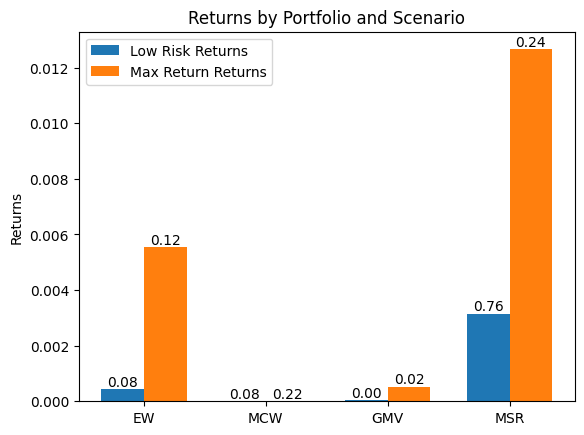

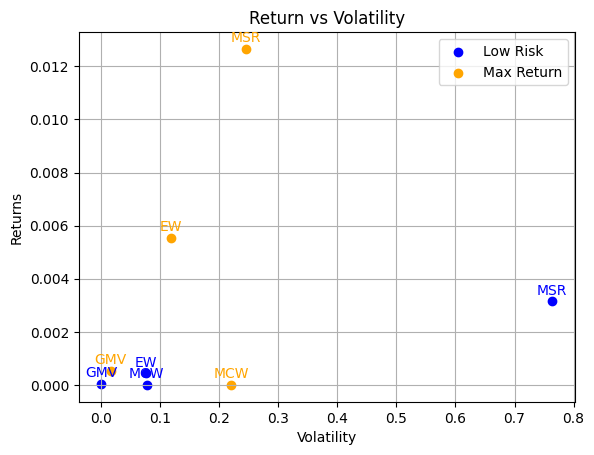

In [69]:
# Portfolio Performance Visualization

# Portfolios list
portfolios = ['EW', 'MCW', 'GMV', 'MSR']

# Collect data for visualization
low_risk_returns = [ew_ret_min, mcw_ret_min, gmv_ret_min, msr_ret_min]
low_risk_volatility = [ew_vol_min, mcw_vol_min, gmv_vol_min, msr_vol_min]
max_return_returns = [ew_ret_max, mcw_ret_max, gmv_ret_max, msr_ret_max]
max_return_volatility = [ew_vol_max, mcw_vol_max, gmv_vol_max, msr_vol_max]

# Bar Chart
x = np.arange(len(portfolios))  # the label locations
width = 0.35                    # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, low_risk_returns, width, label='Low Risk Returns')
bars2 = ax.bar(x + width/2, max_return_returns, width, label='Max Return Returns')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Returns')
ax.set_title('Returns by Portfolio and Scenario')
ax.set_xticks(x)
ax.set_xticklabels(portfolios)
ax.legend()

# Adding volatility lines
for i in range(len(portfolios)):
    ax.annotate(f'{low_risk_volatility[i]:.2f}', 
                xy=(x[i] - width/2, low_risk_returns[i]), 
                ha='center', va='bottom')
    ax.annotate(f'{max_return_volatility[i]:.2f}', 
                xy=(x[i] + width/2, max_return_returns[i]), 
                ha='center', va='bottom')
plt.show()

# Scatter Plot
plt.figure()
plt.scatter(low_risk_volatility, low_risk_returns, label='Low Risk', color='blue')
plt.scatter(max_return_volatility, max_return_returns, label='Max Return', color='orange')

# Label each point with its corresponding portfolio name
for i, portfolio in enumerate(portfolios):
    plt.annotate(portfolio, 
                 (low_risk_volatility[i], low_risk_returns[i]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center', 
                 color='blue')
    plt.annotate(portfolio, 
                 (max_return_volatility[i], max_return_returns[i]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center', 
                 color='orange')

plt.title('Return vs Volatility')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

Based on the above graphs,
- Maximum Return Portfolio:
    - MSR Portfolio
        - Return: 0.01265588890798839
        - Volatility: 0.24480420611521617
- Low Risk Portfolio:
    - GMV Portfolio
        - Return: 3.391024191998884e-05 (approximately 0.00003391)
        - Volatility: 0.0001292953800300517

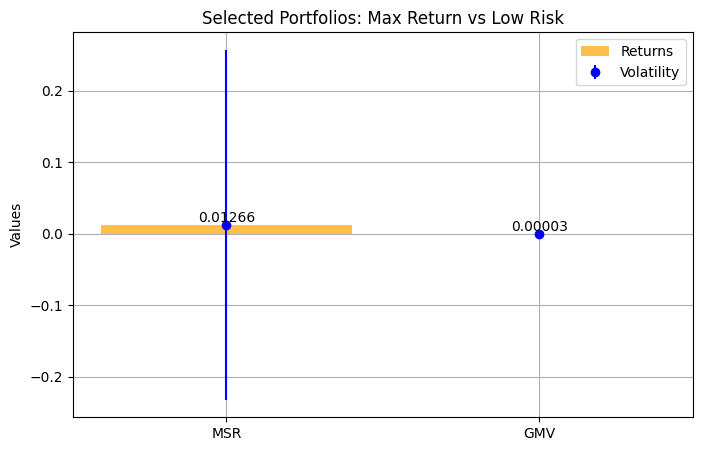

In [70]:
# Data for selected portfolios
selected_portfolios = ['MSR', 'GMV']
selected_returns = [msr_ret_max,gmv_ret_min]
selected_volatility = [msr_vol_max, gmv_vol_min]

# Bar Chart for Selected Portfolios
plt.figure(figsize=(8, 5))
x = range(len(selected_portfolios))

# Create bars for returns
plt.bar(x, selected_returns, color='orange', label='Returns', alpha=0.7)

# Add volatility lines
for i in range(len(selected_portfolios)):
    plt.text(i, selected_returns[i], f'{selected_returns[i]:.5f}', ha='center', va='bottom')
    plt.errorbar(i, selected_returns[i], yerr=selected_volatility[i], fmt='o', color='blue', label='Volatility' if i == 0 else "")

plt.xticks(x, selected_portfolios)
plt.ylabel('Values')
plt.title('Selected Portfolios: Max Return vs Low Risk')
plt.legend()
plt.grid()
plt.show()


# PSO

In [71]:
def objective_function(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    # Calculate the expected portfolio return
    portfolio_return = np.sum(weights * mean_returns)
    # Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Calculate the Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    # We want to maximize the Sharpe ratio, so we return its negative
    return -sharpe_ratio

def initialize_swarm(num_particles, num_assets):
    # Randomly initialize particle positions and velocities
    positions = np.random.dirichlet(np.ones(num_assets), size=num_particles)
    velocities = np.random.rand(num_particles, num_assets) * 0.1  # Small random velocities
    return positions, velocities


def update_velocity(positions, velocities, personal_best_positions, global_best_position, w=0.5, c1=1.5, c2=1.5):
    r1 = np.random.rand(*positions.shape)
    r2 = np.random.rand(*positions.shape)
    
    cognitive_component = c1 * r1 * (personal_best_positions - positions)
    social_component = c2 * r2 * (global_best_position - positions)
    
    new_velocities = (w * velocities) + cognitive_component + social_component
    return new_velocities

def update_position(positions, velocities):
    new_positions = positions + velocities
    # Ensure weights are non-negative and sum to 1
    new_positions = np.clip(new_positions, 0, 1)
    new_positions /= np.sum(new_positions, axis=1)[:, np.newaxis]  # Normalize
    return new_positions

def pso_optimize(mean_returns, cov_matrix, num_particles=30, max_iterations=100):
    np.random.seed(42)
    num_assets = len(mean_returns)
    positions, velocities = initialize_swarm(num_particles, num_assets)
    
    personal_best_positions = positions.copy()
    personal_best_scores = np.array([objective_function(p, mean_returns, cov_matrix) for p in positions])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = np.min(personal_best_scores)

    for _ in range(max_iterations):
        velocities = update_velocity(positions, velocities, personal_best_positions, global_best_position)
        positions = update_position(positions, velocities)

        # Update personal and global bests
        for i in range(num_particles):
            score = objective_function(positions[i], mean_returns, cov_matrix)
            if score < personal_best_scores[i]:  # Minimizing the objective function
                personal_best_scores[i] = score
                personal_best_positions[i] = positions[i]

        # Update global best
        best_particle_idx = np.argmin(personal_best_scores)
        if personal_best_scores[best_particle_idx] < global_best_score:
            global_best_score = personal_best_scores[best_particle_idx]
            global_best_position = personal_best_positions[best_particle_idx]

    return global_best_position  # Return optimal weights

weights_series_max = pd.Series(msr_weights_max, index=max_return_10stock, name = 'Ticker')
weights_series_min = pd.Series(gmv_weights_min, index=min_risk_10stock, name = 'Ticker')


optimal_weights_min = pso_optimize(weights_series_min, cov_matrix_min)
optimal_weights_max = pso_optimize(weights_series_max, cov_matrix_max)
print("Optimal Weights min:", optimal_weights_min)
print("Optimal Weights max:", optimal_weights_max)



Optimal Weights min: [0.         0.         0.         0.         0.         0.01782204
 0.         0.55485916 0.         0.4273188 ]
Optimal Weights max: [0.07833484 0.92166516 0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [72]:
def update_position(positions, velocities, min_weight=0.01):
    # Update positions based on velocities
    new_positions = positions + velocities
    
    # Ensure weights are within bounds and sum to 1
    new_positions = np.clip(new_positions, min_weight, 1)
    
    # Normalize to ensure they sum to 1
    new_positions /= np.sum(new_positions, axis=1)[:, np.newaxis]  
    return new_positions

def pso_optimize(mean_returns, cov_matrix, num_particles=30, max_iterations=100, min_weight=0.01):
    np.random.seed(42)
    num_assets = len(mean_returns)
    positions, velocities = initialize_swarm(num_particles, num_assets)
    
    personal_best_positions = positions.copy()
    personal_best_scores = np.array([objective_function(p, mean_returns, cov_matrix) for p in positions])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = np.min(personal_best_scores)

    for _ in range(max_iterations):
        velocities = update_velocity(positions, velocities, personal_best_positions, global_best_position)
        positions = update_position(positions, velocities, min_weight)

        # Update personal and global bests
        for i in range(num_particles):
            score = objective_function(positions[i], mean_returns, cov_matrix)
            if score < personal_best_scores[i]:  # Minimizing the objective function
                personal_best_scores[i] = score
                personal_best_positions[i] = positions[i]

        # Update global best
        best_particle_idx = np.argmin(personal_best_scores)
        if personal_best_scores[best_particle_idx] < global_best_score:
            global_best_score = personal_best_scores[best_particle_idx]
            global_best_position = personal_best_positions[best_particle_idx]

    return global_best_position  # Return optimal weights

# Initialize weights series and perform optimization
weights_series_max = pd.Series(msr_weights_max, index=max_return_10stock, name='Ticker')
weights_series_min = pd.Series(gmv_weights_min, index=min_risk_10stock, name='Ticker')

optimal_weights_min = pso_optimize(weights_series_min, cov_matrix_min, min_weight=0.01)
optimal_weights_max = pso_optimize(weights_series_max, cov_matrix_max, min_weight=0.01)

print("Optimal Weights min:", optimal_weights_min)
print("Optimal Weights max:", optimal_weights_max)


Optimal Weights min: [0.13650548 0.1489159  0.11920336 0.02236898 0.00075375 0.12752669
 0.02704569 0.16455863 0.16034375 0.09277778]
Optimal Weights max: [0.07203333 0.84798883 0.00999723 0.00999723 0.00999723 0.00999723
 0.00999723 0.00999723 0.00999723 0.00999723]


In [73]:
def calculate_performance(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Initialize weights series and perform optimization
weights_series_max = pd.Series(msr_weights_max, index=max_return_10stock, name='Ticker')
weights_series_min = pd.Series(gmv_weights_min, index=min_risk_10stock, name='Ticker')

optimal_weights_min = pso_optimize(weights_series_min, cov_matrix_min, min_weight=0.01)
optimal_weights_max = pso_optimize(weights_series_max, cov_matrix_max, min_weight=0.01)

# Calculate performance metrics
return_min, volatility_min, sharpe_min = calculate_performance(optimal_weights_min, mean_returns_min, cov_matrix_min)
return_max, volatility_max, sharpe_max = calculate_performance(optimal_weights_max, mean_returns_max, cov_matrix_max)

# Print the results
print("Optimal Weights min:", optimal_weights_min)
print(f"Performance (Min Risk) - Return: {return_min:.4f}, Volatility: {volatility_min:.4f}, Sharpe Ratio: {sharpe_min:.4f}")
print("Optimal Weights max:", optimal_weights_max)
print(f"Performance (Max Sharpe) - Return: {return_max:.4f}, Volatility: {volatility_max:.4f}, Sharpe Ratio: {sharpe_max:.4f}")


Optimal Weights min: [0.13650548 0.1489159  0.11920336 0.02236898 0.00075375 0.12752669
 0.02704569 0.16455863 0.16034375 0.09277778]
Performance (Min Risk) - Return: 0.0001, Volatility: 0.0054, Sharpe Ratio: -1.8354
Optimal Weights max: [0.07203333 0.84798883 0.00999723 0.00999723 0.00999723 0.00999723
 0.00999723 0.00999723 0.00999723 0.00999723]
Performance (Max Sharpe) - Return: 0.0112, Volatility: 0.2015, Sharpe Ratio: 0.0058


# LSTM

## min risk portfolio

In [74]:
# Sample historical weights data (this should be your actual historical weights)
historical_weights = np.random.rand(100, len(weights_series_min))  # Replace with your actual data

# Scale the weights
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_weights = scaler.fit_transform(historical_weights)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        Y.append(data[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 5  # Number of previous time steps to use for prediction
X, y = create_dataset(scaled_weights, time_step)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(len(weights_series_min)))  # Output layer size equals the number of assets

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
predicted_weights_min = model.predict(X_test)

# Inverse scale the predicted weights to get them back to the original scale
predicted_weights_min = scaler.inverse_transform(predicted_weights_min)

# Output the predicted weights
print("Predicted Weights:", predicted_weights_min)


Epoch 1/100


/opt/anaconda3/envs/IRS1/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.0763 - loss: 0.3255
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1197 - loss: 0.2750
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1041 - loss: 0.2266
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1002 - loss: 0.1862 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1041 - loss: 0.1461 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1119 - loss: 0.1223 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1041 - loss: 0.1024 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1554 - loss: 0.0951 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0940 - loss: 0.0916 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1581 - loss: 0.0939 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1080 - loss: 0.0900 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1358 - loss: 0.0878 
E

In [75]:
# Assume y_test contains the actual weights from the dataset
# Note: If you need to scale y_test back, do it the same way you did for predicted_weights
# Inverse scaling for y_test if it was scaled earlier
# y_test_scaled = scaler.inverse_transform(y_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_weights_min)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_weights_min)

# Calculate R-squared
r_squared = 1 - (np.sum((y_test - predicted_weights_min) ** 2) / np.sum((y_test - np.mean(y_test, axis=0)) ** 2))

# Print the accuracy metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")


Mean Absolute Error (MAE): 0.2665
Mean Squared Error (MSE): 0.0978
R-squared: -0.2388


In [76]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - loss: 0.0766 - mae: 0.2346 - mse: 0.0766 - val_loss: 0.0787 - val_mae: 0.2340 - val_mse: 0.0787
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0734 - mae: 0.2281 - mse: 0.0734 - val_loss: 0.0799 - val_mae: 0.2387 - val_mse: 0.0799
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0760 - mae: 0.2339 - mse: 0.0760 - val_loss: 0.0782 - val_mae: 0.2367 - val_mse: 0.0782
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0729 - mae: 0.2288 - mse: 0.0729 - val_loss: 0.0764 - val_mae: 0.2340 - val_mse: 0.0764
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0728 - mae: 0.2307 - mse: 0.0728 - val_loss: 0.0761 - val_mae: 0.2325 - val_mse: 0.0761
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0729 - mae: 0.2282 - mse: 0.0729 - val_loss: 0.0763 - val_mae: 0.2305 - val_mse: 0.0763
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0724 - mae: 0.2270 - mse: 0.0724 - val_loss: 0.0760 - val_

In [77]:
model.save('low_risk_lstm.h5')

In [78]:
model.save('k_pso_low_risk_lstm.weights.h5')

## max return portfolio

In [86]:
print(X_train.shape[1],X_train.shape[2])
print(len(weights_series_max))
print(weights_series_min)

5 10
10
QQQ        0.000000e+00
IVV        3.114527e-17
VOO        0.000000e+00
SPY        4.820681e-04
ARKK       0.000000e+00
ES3.SI     3.111485e-01
VTI        0.000000e+00
CEDU.SI    3.465596e-01
S68.SI     0.000000e+00
CJLU.SI    3.418099e-01
Name: Ticker, dtype: float64


In [88]:
# Sample historical weights data (this should be your actual historical weights)
historical_weights = np.random.rand(100, len(weights_series_max)) 

# Scale the weights
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_weights = scaler.fit_transform(historical_weights)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        Y.append(data[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 5  # Number of previous time steps to use for prediction
X, y = create_dataset(scaled_weights, time_step)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# print(X_train.shape[1], X_train.shape[2],len(weights_series_max))
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(len(weights_series_max)))  # Output layer size equals the number of assets

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
predicted_weights_max = model.predict(X_test)

# Inverse scale the predicted weights to get them back to the original scale
predicted_weights_max = scaler.inverse_transform(predicted_weights_max)

# Output the predicted weights
print("Predicted Weights:", predicted_weights_max)


5 10 10
Epoch 1/100


/opt/anaconda3/envs/IRS1/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3361  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3030
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2660
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2254 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1774 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1318 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0951 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1009 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0924 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0883 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0895 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0896 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0880 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0859 
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━

In [80]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_weights_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_weights_max)

# Calculate R-squared
r_squared = 1 - (np.sum((y_test - predicted_weights_max) ** 2) / np.sum((y_test - np.mean(y_test, axis=0)) ** 2))

# Print the accuracy metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")


Mean Absolute Error (MAE): 0.2866
Mean Squared Error (MSE): 0.1122
R-squared: -0.3569


In [81]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0802 - mae: 0.2414 - mse: 0.0802 - val_loss: 0.0686 - val_mae: 0.2230 - val_mse: 0.0686
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0762 - mae: 0.2347 - mse: 0.0762 - val_loss: 0.0708 - val_mae: 0.2282 - val_mse: 0.0708
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0752 - mae: 0.2320 - mse: 0.0752 - val_loss: 0.0718 - val_mae: 0.2293 - val_mse: 0.0718
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0768 - mae: 0.2347 - mse: 0.0768 - val_loss: 0.0729 - val_mae: 0.2297 - val_mse: 0.0729
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0775 - mae: 0.2389 - mse: 0.0775 - val_loss: 0.0743 - val_mae: 0.2314 - val_mse: 0.0743
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0742 - mae: 0.2321 - mse: 0.0742 - val_loss: 0.0734 - val_mae: 0.2311 - val_mse: 0.0734
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0742 - mae: 0.2319 - mse: 0.0742 - val_loss: 0.0727 - val_

In [82]:
model.save('high_return_lstm.h5')

In [83]:
model.save('k_pso_high_return_lstm.weights.h5')